In [168]:
# Importing libraries and the CSV file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Fashion data.csv')
print(df.head())

                         Product ID  \
0  eac7efa5dbd3d667f26eb3d3ab504464   
1  b17540ef7e86e461d37f3ae58b7b72ac   
2  348f344247b0c1a935b1223072ef9d8a   
3  e12b92dbb8eaee78b22965d2a9bbbd9f   
4  e33a9adeed5f36840ccc227db4682a36   

                                        Product Name Manufacturer   Price  \
0                              Hornby 2014 Catalogue       Hornby   £3.42   
1  FunkyBuys® Large Christmas Holiday Express Fes...    FunkyBuys  £16.99   
2  CLASSIC TOY TRAIN SET TRACK CARRIAGES LIGHT EN...          ccf   £9.99   
3     HORNBY Coach R4410A BR Hawksworth Corridor 3rd       Hornby  £39.99   
4  Hornby 00 Gauge 0-4-0 Gildenlow Salt Co. Steam...       Hornby  £32.19   

  Number of available in stock Number of Reviews      Average Rating  
0                        5 new                15  4.9 out of 5 stars  
1                          NaN                 2  4.5 out of 5 stars  
2                        2 new                17  3.9 out of 5 stars  
3                 

In [169]:
# Dropping first two columns. They aren't useful for the analysis

df = df.drop(['Product ID', 'Product Name'], axis=1)
print(df.head())

  Manufacturer   Price Number of available in stock Number of Reviews  \
0       Hornby   £3.42                        5 new                15   
1    FunkyBuys  £16.99                          NaN                 2   
2          ccf   £9.99                        2 new                17   
3       Hornby  £39.99                          NaN                 1   
4       Hornby  £32.19                          NaN                 3   

       Average Rating  
0  4.9 out of 5 stars  
1  4.5 out of 5 stars  
2  3.9 out of 5 stars  
3  5.0 out of 5 stars  
4  4.7 out of 5 stars  


In [170]:
# Looking at the size and the description of the dataframe

print(df.shape)
df.describe()

(10000, 5)


,Manufacturer,Price,Number of available in stock,Number of Reviews,Average Rating
count,9993,8565,7500,9982,9982
unique,2651,2625,89,194,19
top,LEGO,£9.99,2 new,1,5.0 out of 5 stars
freq,171,189,1337,4315,5140


In [171]:
# Checking for NULL values

print(df.isnull().sum())

Manufacturer                       7
Price                           1435
Number of available in stock    2500
Number of Reviews                 18
Average Rating                    18
dtype: int64


In [172]:
# There are too many missing values in two columns. We will replace them with mode

df['Price'] = df['Price'].fillna(df['Price'].mode()[0])
df['Number of available in stock'] = df['Number of available in stock'].fillna(df['Number of available in stock'].mode()[0])

In [173]:
# We can drop the rest of the rows

df = df[pd.notnull(df['Manufacturer'])]
df = df[pd.notnull(df['Number of Reviews'])]
df = df[pd.notnull(df['Average Rating'])]

In [174]:
# There are no more NULL values

print(df.isnull().sum())

Manufacturer                    0
Price                           0
Number of available in stock    0
Number of Reviews               0
Average Rating                  0
dtype: int64


In [175]:
# We will need to change some data types to int and float

print(df.dtypes)

Manufacturer                    object
Price                           object
Number of available in stock    object
Number of Reviews               object
Average Rating                  object
dtype: object


In [176]:
print(df.head())
print(df.shape)

  Manufacturer   Price Number of available in stock Number of Reviews  \
0       Hornby   £3.42                        5 new                15   
1    FunkyBuys  £16.99                        2 new                 2   
2          ccf   £9.99                        2 new                17   
3       Hornby  £39.99                        2 new                 1   
4       Hornby  £32.19                        2 new                 3   

       Average Rating  
0  4.9 out of 5 stars  
1  4.5 out of 5 stars  
2  3.9 out of 5 stars  
3  5.0 out of 5 stars  
4  4.7 out of 5 stars  
(9975, 5)


In [177]:
# We will leave first column as it is
# Some values aren't convertable in 'Number of Reviews' column. We will drop those rows

df = df[df['Number of Reviews'] != '1,040']
df = df[df['Number of Reviews'] != '1,399']

In [178]:
print(df.shape)

(9973, 5)


In [179]:
# Converting values from string to float to integer because it should be a whole number

df['Number of Reviews'] = df['Number of Reviews'].astype(str).astype(float).astype(int)

In [180]:
print(df.dtypes)

Manufacturer                    object
Price                           object
Number of available in stock    object
Number of Reviews                int32
Average Rating                  object
dtype: object


In [181]:
# We will need to extract values from strings in two columns
# 'Number of available in stock' should be an integer while 'Price' can be a float

df['Number of available in stock'] = df['Number of available in stock'].str.extract('(\d+)')
df['Number of available in stock'] = df['Number of available in stock'].astype(str).astype(int)
df['Price'] = df['Price'].str.extract('(\d+)')
df['Price'] = df['Price'].astype(str).astype(float)

In [182]:
print(df.dtypes)

Manufacturer                     object
Price                           float64
Number of available in stock      int32
Number of Reviews                 int32
Average Rating                   object
dtype: object


In [183]:
# We will extract the first part of this column. It will be a float

df['Average Rating'] = df['Average Rating'].str.split(' ').str[0]
df['Average Rating'] = df['Average Rating'].astype(str).astype(float)

In [184]:
# We converted all types in needed columns

print(df.dtypes)
df.head()

Manufacturer                     object
Price                           float64
Number of available in stock      int32
Number of Reviews                 int32
Average Rating                  float64
dtype: object


,Manufacturer,Price,Number of available in stock,Number of Reviews,Average Rating
0,Hornby,3.0,5,15,4.9
1,FunkyBuys,16.0,2,2,4.5
2,ccf,9.0,2,17,3.9
3,Hornby,39.0,2,1,5.0
4,Hornby,32.0,2,3,4.7


In [188]:
# Checking description again. Looks like there are many outliers

df.describe()

,Price,Number of available in stock,Number of Reviews,Average Rating
count,9973.000000,9973.000000,9973.000000,9973.000000
mean,17.833551,6.421338,8.881179,4.707340
std,35.623611,8.011196,28.887912,0.372269
min,0.000000,1.000000,1.000000,2.300000
25%,5.000000,2.000000,1.000000,4.500000
50%,9.000000,3.000000,2.000000,5.000000
75%,17.000000,7.000000,6.000000,5.000000
max,995.000000,92.000000,802.000000,5.000000


In [189]:
# Looking at correlation. There isn't a strong correlation

df.corr()

,Price,Number of available in stock,Number of Reviews,Average Rating
Price,1.000000,0.004424,-0.026063,0.043345
Number of available in stock,0.004424,1.000000,0.210269,-0.013825
Number of Reviews,-0.026063,0.210269,1.000000,-0.126611
Average Rating,0.043345,-0.013825,-0.126611,1.000000


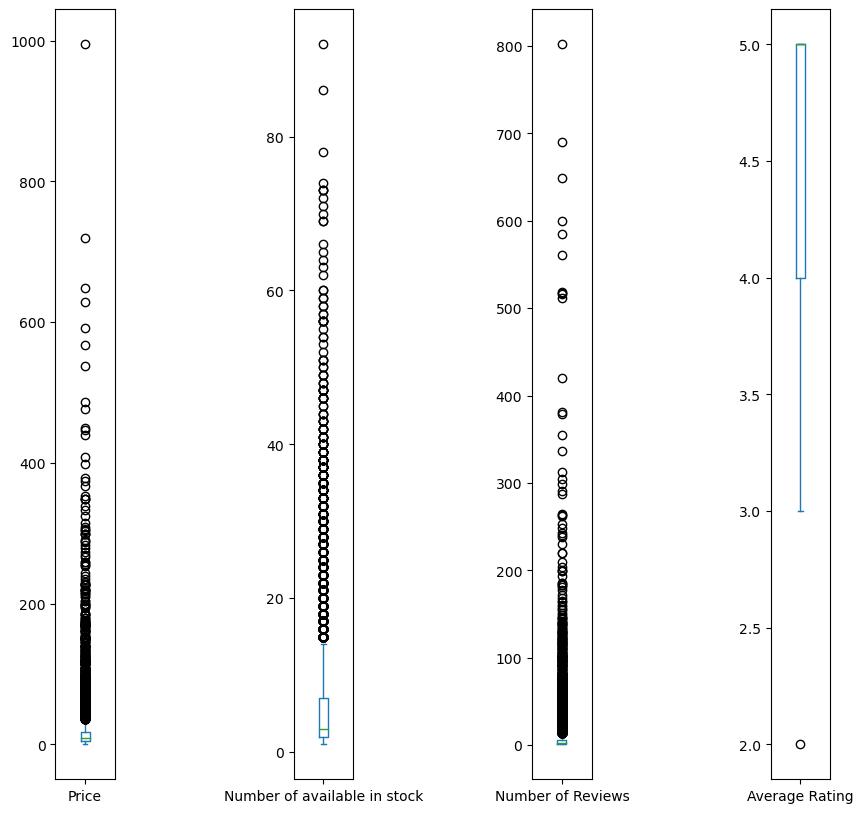

In [191]:
# Making box plots for each column. There are too many outliers

data.plot(
    kind='box',
    subplots= True,
    sharey= False,
    figsize=(10,10)
)
plt.subplots_adjust(wspace=3)
plt.show()